In [ ]:
import pandas as pd

In [ ]:
# Read fiberbits data file
customers = pd.read_csv("https://raw.githubusercontent.com/Prasad-Mamidi/Machine_Learning/main/Datasets/Fiberbits.csv")

In [ ]:
#fiberbits companies customer data information overview
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   active_cust                 100000 non-null  int64
 1   income                      100000 non-null  int64
 2   months_on_network           100000 non-null  int64
 3   Num_complaints              100000 non-null  int64
 4   number_plan_changes         100000 non-null  int64
 5   relocated                   100000 non-null  int64
 6   monthly_bill                100000 non-null  int64
 7   technical_issues_per_month  100000 non-null  int64
 8   Speed_test_result           100000 non-null  int64
dtypes: int64(9)
memory usage: 6.9 MB


In [ ]:
#description of full customer data
customers.describe()

,active_cust,income,months_on_network,Num_complaints,number_plan_changes,relocated,monthly_bill,technical_issues_per_month,Speed_test_result
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000
mean,0.578590,1855.279910,58.402450,4.012840,1.385410,0.123480,95.816450,3.31673,81.668540
std,0.493787,2712.385257,18.643736,0.285265,1.617101,0.328989,50.161327,1.24147,9.952554
min,0.000000,1130.000000,-20.000000,3.000000,0.000000,0.000000,30.000000,1.00000,72.000000
25%,0.000000,1674.000000,47.000000,4.000000,0.000000,0.000000,45.000000,3.00000,78.000000
50%,1.000000,1805.000000,56.000000,4.000000,1.000000,0.000000,87.000000,4.00000,81.000000
75%,1.000000,1907.000000,70.000000,4.000000,2.000000,0.000000,133.000000,4.00000,85.000000
max,1.000000,229821.000000,449.000000,6.000000,9.000000,1.000000,181.000000,7.00000,332.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report

In [ ]:
customers.corr()["active_cust"]

,active_cust
active_cust,1.000000
income,0.001201
months_on_network,0.188113
Num_complaints,-0.083481
number_plan_changes,-0.283100
relocated,-0.381069
monthly_bill,-0.060156
technical_issues_per_month,-0.260249
Speed_test_result,0.156385


In [ ]:
# model traning
x = customers[['income']+['months_on_network']+['Num_complaints']+['number_plan_changes']+['relocated']+['monthly_bill']+['technical_issues_per_month']+['Speed_test_result']]
y = customers['active_cust']
scale = StandardScaler()
X = scale.fit_transform(x)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
model =  LogisticRegression(max_iter=1000)
fit   = model.fit(X_train,y_train)
fit.coef_
fit.intercept_
# predicting the model values
y_pred = fit.predict(X_test)
# accuracy of the model
print(f"accuracy is {accuracy_score(y_test,y_pred)*100:.2f}%")

accuracy is 76.39%


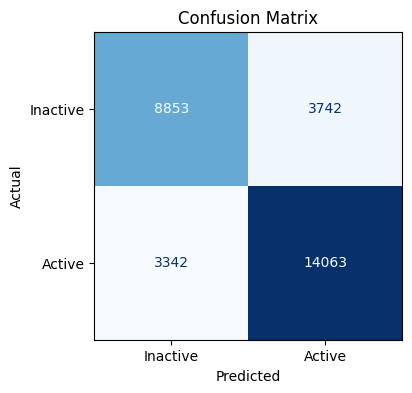

In [ ]:
fig , ax = plt.subplots(figsize=(4,4))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=["Inactive","Active"]).plot(ax=ax,cmap="Blues",colorbar=False)
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.70      0.71     12595
           1       0.79      0.81      0.80     17405

    accuracy                           0.76     30000
   macro avg       0.76      0.76      0.76     30000
weighted avg       0.76      0.76      0.76     30000



##Multicollinearity in Logistic Regression

In [ ]:
def vif(data):
  col = data.columns
  for i in range(0,col.shape[0]):
    y = data[col[i]]
    x = data[col.drop(col[i])]
    y_pred = LinearRegression().fit(x,y).predict(x)
    vif = 1/(1-(r2_score(y,y_pred)))
    print(f"{col[i]} : {vif:.2f}")
vif(customers.drop(columns="active_cust"))

income : 1.02
months_on_network : 1.03
Num_complaints : 1.01
number_plan_changes : 1.59
relocated : 1.56
monthly_bill : 1.02
technical_issues_per_month : 1.06
Speed_test_result : 1.00


In [ ]:
# model traning
x = customers[['income']+['months_on_network']+['Num_complaints']+['number_plan_changes']+['relocated']+['monthly_bill']+['technical_issues_per_month']+['Speed_test_result']]
y = customers['active_cust']
scale = StandardScaler()
X = scale.fit_transform(x)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model =  LogisticRegression(max_iter=1000)
fit   = model.fit(X_train,y_train)
fit.coef_
fit.intercept_
# predicting the model values
y_pred = fit.predict(X_test)
# accuracy of the model
print(f"accuracy is {accuracy_score(y_test,y_pred)*100:.2f}%")

accuracy is 76.50%


In [ ]:
import statsmodels.api as sm
result = sm.Logit(customers['active_cust'],sm.add_constant(customers[['income']+['months_on_network']+['Num_complaints']+['number_plan_changes']+['relocated']+['monthly_bill']+['technical_issues_per_month']+['Speed_test_result']])).fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.493647
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:            active_cust   No. Observations:               100000
Model:                          Logit   Df Residuals:                    99991
Method:                           MLE   Df Model:                            8
Date:                Mon, 05 Aug 2024   Pseudo R-squ.:                  0.2748
Time:                        00:59:19   Log-Likelihood:                -49365.
converged:                       True   LL-Null:                       -68074.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        -17.6101      0.301    -58.538      0.000     -

##Rank ordering of impactful variables
### the higher value higher the rank

In [ ]:
z_values = result.tvalues
z_values**2

,0
const,3426.653867
income,433.463176
months_on_network,821.061948
Num_complaints,520.342335
number_plan_changes,621.981031
relocated,6388.288805
monthly_bill,195.857205
technical_issues_per_month,2979.111044
Speed_test_result,8730.048329
